# Preparación para el TF MDS

## Modelación

Dataset: https://www.yelp.com/dataset/documentation/main

**Requiere ejecución prévia del notebook 01_preparación_de_los_datos** para recortar las fotos al formato PNG con 224 x 224 y organizarlas en carpetas.

In [1]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


### Tuneo del modelo google/vit-base-patch16-224-in21k con nuestro toy dataset
Se utiliza la versión [vit-base-patch16-224-in21k](https://huggingface.co/google/vit-base-patch16-224-in21k) del **Transformer ViT**, ya pré-entrenado con 14 millones de imagenes en 21.843 clases.

In [4]:
%run run_image_classification.py --train_dir dataset/toy --output_dir ./outputs/ --remove_unused_columns False --do_train --do_eval

[INFO|training_args.py:1296] 2022-08-19 19:54:34,993 >> PyTorch: setting up devices
[INFO|training_args.py:1131] 2022-08-19 19:54:34,995 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


08/19/2022 19:54:35 - WARNING - __main__ - Process rank: -1, device: cpu, n_gpu: 0distributed training: False, 16-bits training: False
08/19/2022 19:54:35 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=0,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend

Resolving data files:   0%|          | 0/500 [00:00<?, ?it/s]

08/19/2022 19:54:36 - WARNING - datasets.builder - Using custom data configuration default-2d77ad76b99262ac
                

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-2d77ad76b99262ac/0.0.0/0fc50c79b681877cc46b23245a6ef5333d036f48db40d53765a68034bc48faff. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Casting the dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

[INFO|configuration_utils.py:643] 2022-08-19 19:54:38,979 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/1ba429d32753f33a0660b80ac6f43a3c80c18938/config.json
[INFO|configuration_utils.py:695] 2022-08-19 19:54:38,980 >> Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224-in21k",
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "finetuning_task": "image-classification",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "drink",
    "1": "food",
    "2": "inside",
    "3": "menu",
    "4": "outside"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "drink": "0",
    "food": "1",
    "inside": "2",
    "menu": "3",
    "outside": "4"
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "n

Step,Training Loss


[INFO|trainer.py:1857] 2022-08-19 20:05:42,655 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2651] 2022-08-19 20:05:42,669 >> Saving model checkpoint to ./outputs/
[INFO|configuration_utils.py:440] 2022-08-19 20:05:42,679 >> Configuration saved in ./outputs/config.json
[INFO|modeling_utils.py:1569] 2022-08-19 20:05:48,653 >> Model weights saved in ./outputs/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-19 20:05:48,662 >> Feature extractor saved in ./outputs/preprocessor_config.json
[INFO|trainer.py:2902] 2022-08-19 20:05:48,696 >> ***** Running Evaluation *****
[INFO|trainer.py:2904] 2022-08-19 20:05:48,697 >>   Num examples = 75
[INFO|trainer.py:2907] 2022-08-19 20:05:48,699 >>   Batch size = 8


***** train metrics *****
  epoch                    =        3.0
  total_flos               = 92019274GF
  train_loss               =      0.826
  train_runtime            = 0:10:59.72
  train_samples_per_second =      1.933
  train_steps_per_second   =      0.246


***** eval metrics *****
  epoch                   =        3.0
  eval_accuracy           =       0.92
  eval_loss               =     0.4682
  eval_runtime            = 0:00:14.30
  eval_samples_per_second =      5.242
  eval_steps_per_second   =      0.699


Alcanzamos un accuracy del 92%

### Predicir imagen nueva

In [2]:
# Buscar una imagen (recortada) que no esté en el dataset usado para tunear

df5 = pickle.load(open('checkpoints/df5.pkl','rb'))

dataset_path = 'dataset/toy'
full_dataset_path = 'dataset/photos' #fotos  no recortadas

for img in range(len(df5)):
    if not os.path.exists(dataset_path + '/'+ df5.iloc[img].label + '/' + df5.iloc[img].photo_id + '.png'):
        new_image_path = full_dataset_path + '/' + df5.iloc[img].photo_id + '.jpg'
        print('{} no existe en el toy dataset'.format(new_image_path))
        break 

dataset/photos/--0h6FMC0V8aMtKQylojEg.jpg no existe en el toy dataset


In [8]:
# predicción con el modelo pre-entrenado (pero no tuneado)

#url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(new_image_path)

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

# outputs\checkpoint-500

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

[INFO|feature_extraction_utils.py:432] 2022-08-19 20:39:09,002 >> loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224/snapshots/5dca96d358b3fcb9d53b3d3881eb1ae20b6752d1/preprocessor_config.json
[INFO|feature_extraction_utils.py:469] 2022-08-19 20:39:09,003 >> Feature extractor ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}



Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

[INFO|configuration_utils.py:643] 2022-08-19 20:39:10,041 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224/snapshots/5dca96d358b3fcb9d53b3d3881eb1ae20b6752d1/config.json
[INFO|configuration_utils.py:695] 2022-08-19 20:39:10,049 >> Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "tench, Tinca tinca",
    "1": "goldfish, Carassius auratus",
    "2": "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",
    "3": "tiger shark, Galeocerdo cuvieri",
    "4": "hammerhead, hammerhead shark",
    "5": "electric ray, crampfish, numbfish, torpedo",
    "6": "stingray",
    "7": "cock",
    "8": "hen",
    "9": "ostrich, Struthio camelus",
    "10":

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

[INFO|modeling_utils.py:2067] 2022-08-19 20:39:19,148 >> loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224/snapshots/5dca96d358b3fcb9d53b3d3881eb1ae20b6752d1/pytorch_model.bin
[INFO|modeling_utils.py:2501] 2022-08-19 20:39:20,243 >> All model checkpoint weights were used when initializing ViTForImageClassification.

[INFO|modeling_utils.py:2509] 2022-08-19 20:39:20,244 >> All the weights of ViTForImageClassification were initialized from the model checkpoint at google/vit-base-patch16-224.
If your task is similar to the task the model of the checkpoint was trained on, you can already use ViTForImageClassification for predictions without further training.


Predicted class: tobacco shop, tobacconist shop, tobacconist


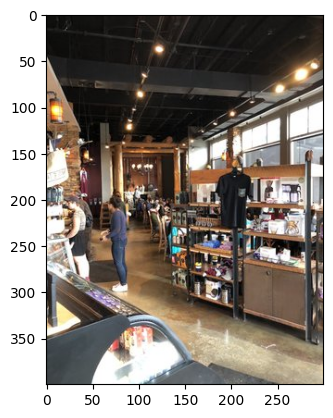

In [9]:
plt.imshow(image);
#ax[0].set_title('Original');

In [4]:
# predicción con el modelo tuneado

#url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(new_image_path)

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('tunning/outputs')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: inside


### Tuneo del modelo google/vit-base-patch16-224-in21k con el dataset completo
Se utiliza la versión [vit-base-patch16-224-in21k](https://huggingface.co/google/vit-base-patch16-224-in21k) del **Transformer ViT**, ya pré-entrenado con 14 millones de imagenes en 21.843 clases.

In [18]:
%run run_image_classification.py --train_dir 'dataset/recortadas/' --output_dir 'tunning/ViT_base_fulldataset/' --remove_unused_columns False --report_to all --do_train --do_eval --ignore_mismatched_sizes True

[INFO|training_args.py:1296] 2022-08-21 17:15:59,639 >> PyTorch: setting up devices


08/21/2022 17:16:00 - WARNING - __main__ - Process rank: -1, device: cpu, n_gpu: 0distributed training: False, 16-bits training: False
08/21/2022 17:16:00 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=0,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend

Resolving data files:   0%|          | 0/196658 [00:00<?, ?it/s]

08/21/2022 17:19:29 - WARNING - datasets.builder - Using custom data configuration default-20c48ff5a7141daa
    

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-20c48ff5a7141daa/0.0.0/0fc50c79b681877cc46b23245a6ef5333d036f48db40d53765a68034bc48faff. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Casting the dataset:   0%|          | 0/20 [00:00<?, ?ba/s]

[INFO|configuration_utils.py:643] 2022-08-21 17:20:20,416 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/1ba429d32753f33a0660b80ac6f43a3c80c18938/config.json
[INFO|configuration_utils.py:695] 2022-08-21 17:20:20,419 >> Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224-in21k",
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "finetuning_task": "image-classification",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "drink",
    "1": "food",
    "2": "inside",
    "3": "menu",
    "4": "outside"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "drink": "0",
    "food": "1",
    "inside": "2",
    "menu": "3",
    "outside": "4"
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "n

Step,Training Loss
500,0.408400
1000,0.249300
1500,0.211500
2000,0.212800
2500,0.218100
3000,0.211000
3500,0.203900
4000,0.183600
4500,0.182200
5000,0.178500


[INFO|trainer.py:2651] 2022-08-21 18:22:29,586 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-500
[INFO|configuration_utils.py:440] 2022-08-21 18:22:29,594 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-500/config.json
[INFO|modeling_utils.py:1569] 2022-08-21 18:22:33,263 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-500/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-21 18:22:33,268 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-500/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-21 18:57:24,640 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-1000
[INFO|configuration_utils.py:440] 2022-08-21 18:57:24,648 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-1000/config.json
[INFO|modeling_utils.py:1569] 2022-08-21 18:57:28,364 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-1000/pytorch_model.bin
[INFO|feature_extraction_util

[INFO|modeling_utils.py:1569] 2022-08-22 02:52:15,019 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-7500/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-22 02:52:15,029 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-7500/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-22 03:26:50,617 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-8000
[INFO|configuration_utils.py:440] 2022-08-22 03:26:50,624 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-8000/config.json
[INFO|modeling_utils.py:1569] 2022-08-22 03:26:56,034 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-8000/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-22 03:26:56,040 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-8000/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-22 04:01:42,328 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-8500
[IN

[INFO|trainer.py:2651] 2022-08-22 11:21:46,120 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-15000
[INFO|configuration_utils.py:440] 2022-08-22 11:21:46,133 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-15000/config.json
[INFO|modeling_utils.py:1569] 2022-08-22 11:21:48,500 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-15000/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-22 11:21:48,510 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-15000/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-22 11:56:56,350 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-15500
[INFO|configuration_utils.py:440] 2022-08-22 11:56:56,358 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-15500/config.json
[INFO|modeling_utils.py:1569] 2022-08-22 11:56:59,442 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-15500/pytorch_model.bin
[INFO|feature_extr

[INFO|modeling_utils.py:1569] 2022-08-22 20:21:26,153 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-22000/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-22 20:21:26,168 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-22000/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-22 20:56:39,296 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-22500
[INFO|configuration_utils.py:440] 2022-08-22 20:56:39,307 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-22500/config.json
[INFO|modeling_utils.py:1569] 2022-08-22 20:56:45,764 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-22500/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-22 20:56:45,775 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-22500/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-22 21:30:23,994 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-23

[INFO|trainer.py:2651] 2022-08-23 05:58:26,988 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-29500
[INFO|configuration_utils.py:440] 2022-08-23 05:58:27,026 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-29500/config.json
[INFO|modeling_utils.py:1569] 2022-08-23 05:58:32,908 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-29500/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-23 05:58:32,918 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-29500/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-23 06:41:22,069 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-30000
[INFO|configuration_utils.py:440] 2022-08-23 06:41:22,088 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-30000/config.json
[INFO|modeling_utils.py:1569] 2022-08-23 06:41:26,827 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-30000/pytorch_model.bin
[INFO|feature_extr

[INFO|modeling_utils.py:1569] 2022-08-23 14:43:01,089 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-36500/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-23 14:43:01,096 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-36500/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-23 15:23:35,962 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-37000
[INFO|configuration_utils.py:440] 2022-08-23 15:23:35,982 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-37000/config.json
[INFO|modeling_utils.py:1569] 2022-08-23 15:23:39,794 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-37000/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-23 15:23:39,807 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-37000/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-23 16:06:16,724 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-37

[INFO|trainer.py:2651] 2022-08-24 08:10:07,818 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-44000
[INFO|configuration_utils.py:440] 2022-08-24 08:10:07,825 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-44000/config.json
[INFO|modeling_utils.py:1569] 2022-08-24 08:10:10,697 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-44000/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-24 08:10:10,707 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-44000/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-24 08:47:35,924 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-44500
[INFO|configuration_utils.py:440] 2022-08-24 08:47:35,938 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-44500/config.json
[INFO|modeling_utils.py:1569] 2022-08-24 08:47:39,600 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-44500/pytorch_model.bin
[INFO|feature_extr

[INFO|modeling_utils.py:1569] 2022-08-24 16:04:01,116 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-51000/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-24 16:04:01,130 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-51000/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-24 17:00:59,603 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-51500
[INFO|configuration_utils.py:440] 2022-08-24 17:00:59,646 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-51500/config.json
[INFO|modeling_utils.py:1569] 2022-08-24 17:01:06,864 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-51500/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-24 17:01:06,871 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-51500/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-24 18:55:18,962 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-52

[INFO|trainer.py:2651] 2022-08-25 02:09:42,694 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-58500
[INFO|configuration_utils.py:440] 2022-08-25 02:09:42,705 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-58500/config.json
[INFO|modeling_utils.py:1569] 2022-08-25 02:09:45,993 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-58500/pytorch_model.bin
[INFO|feature_extraction_utils.py:339] 2022-08-25 02:09:46,001 >> Feature extractor saved in tunning/ViT_base_fulldataset/checkpoint-58500/preprocessor_config.json
[INFO|trainer.py:2651] 2022-08-25 02:42:24,026 >> Saving model checkpoint to tunning/ViT_base_fulldataset/checkpoint-59000
[INFO|configuration_utils.py:440] 2022-08-25 02:42:24,039 >> Configuration saved in tunning/ViT_base_fulldataset/checkpoint-59000/config.json
[INFO|modeling_utils.py:1569] 2022-08-25 02:42:27,381 >> Model weights saved in tunning/ViT_base_fulldataset/checkpoint-59000/pytorch_model.bin
[INFO|feature_extr

***** train metrics *****
  epoch                    =                 3.0
  total_flos               =       36192587909GF
  train_loss               =              0.1353
  train_runtime            = 3 days, 12:57:25.67
  train_samples_per_second =                1.64
  train_steps_per_second   =               0.205


[INFO|trainer.py:2902] 2022-08-25 06:17:52,922 >> ***** Running Evaluation *****
[INFO|trainer.py:2904] 2022-08-25 06:17:53,120 >>   Num examples = 29499
[INFO|trainer.py:2907] 2022-08-25 06:17:53,174 >>   Batch size = 8


***** eval metrics *****
  epoch                   =        3.0
  eval_accuracy           =      0.976
  eval_loss               =     0.0916
  eval_runtime            = 1:08:07.29
  eval_samples_per_second =      7.217
  eval_steps_per_second   =      0.902


Alcanzamos un accuracy del 97,6%

Referencias:
- [Tutorial DeiT](https://pytorch.org/tutorials/beginner/vt_tutorial.html)
- [Tutorial distributed PyTorch](https://theaisummer.com/distributed-training-pytorch/) / [GIT](https://github.com/The-AI-Summer/pytorch-ddp/blob/main/train_ddp_mixed_presicion.py)
- [Tutorial tuneo transformers](https://huggingface.co/docs/transformers/main/en/training#finetune-with-trainer)
- `pip install git+https://github.com/huggingface/transformers` (4.22.0.dev0)
- `pip install datasets`
- `pip install evaluate`
- [PyPi Transformers](https://pypi.org/project/transformers/)
- [Modelo DeiT](https://huggingface.co/facebook/deit-small-distilled-patch16-224) y su [documentación](https://huggingface.co/docs/transformers/main/en/model_doc/deit#overview)   